In [1]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
train_data[0]

array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
          6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
         21.     ,  396.9    ,   18.72   ])

In [6]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

In [7]:
test_data -= mean
test_data /= std

In [8]:
train_data.shape[1]

13

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [10]:
from keras import models
from keras import layers

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = "relu", input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    return model

In [12]:
import numpy as np

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [14]:
for i in range(k):
    print("processing fold #:", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

processing fold #: 0
processing fold #: 1
processing fold #: 2
processing fold #: 3


In [15]:
all_scores

[2.1778027952307522,
 2.1636767930323533,
 2.8145064292567792,
 2.3607488770296077]

In [16]:
np.mean(all_scores)

2.379183723637373

In [19]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print("processing fold#:", i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i + 1) * num_val_samples:]],
                            axis=0)
    
    partial_train_targets = np.concatenate(
                            [train_labels[:i * num_val_samples],
                            train_labels[(i + 1) * num_val_samples:]],
                            axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, validation_data = (val_data, val_targets), verbose = 0)
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)

processing fold#: 0
processing fold#: 1
processing fold#: 2
processing fold#: 3


In [20]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

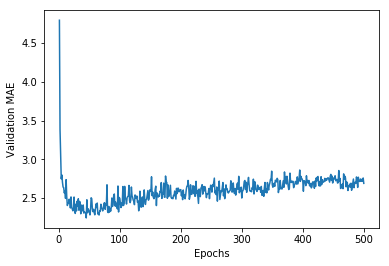

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

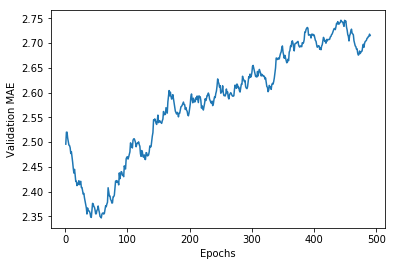

In [23]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous_point = smoothed_points[-1]
            smoothed_points.append(previous_point * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
        
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smoothe_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [25]:
model = build_model()
model.fit(train_data, train_labels, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

 32/102 [========>.....................] - ETA: 0s

In [26]:
test_mse_score

18.11100410012638